# Introduction to the NCAS CF Data Tools, `cf-python` and `cf-plot`

## Context and learning objectives

**What are the NCAS CF Data Tools and why do they all have 'cf' in the name?**

The NCAS CF Data Tools are a suite of Python libraries which are designed to facilitate working with data for research in the earth sciences and aligned domains. The two that are of most relevance to the average user, and those wanting to process, analyse and visualise atmospheric data, are cf-python (https://ncas-cms.github.io/cf-python/) and cf-plot (https://ncas-cms.github.io/cf-plot/build/). We will be focusing on use of cf-python and cf-plot today.

The 'cf' in the names of the NCAS CF Data Tools corresponds to the CF Conventions, a metadata standard, because they are built around this standard in the form of using the CF Data Model, which as well as performance is considered a 'unique selling point' of the tools.


**What are the CF Conventions?**

The CF Conventions are a metadata standard which is becoming the de-facto convention across geoscience to cover the description of data so that sharing and intercomparison is simpler. See https://cfconventions.org/ for more information.


**What are we going to learn in this session?**

Our learning aim is to be able to use the NCAS CF Data Tools Python libraries, namely cf-python and cf-plot to process, analyse and visualise netCDF and PP datasets, whilst appreciating the context and 'unique selling point' of the libraries as being built to use the CF Conventions, a metadata standard for earth science data, to make it simpler to do what you want to do with the datasets, by working on top of a Data Model for CF.

We have six distinct objectives, matching the sections in this notebook (except one section we split into two so we can introduce plotting earlier on). By the end of this lesson you should be familiar and have practiced:

* using cf-python to read dataset(s) and view the (meta)data at different detail levels;
* using cf-python to edit the data and write out the edited data to file;
* reducing datasets using cf-python: subspacing and collapsing;
* visualising datasets using cf-plot: contour and vector plots;
* data analysis using cf-python and cf-plot: arithmetic, statistics and plots of trends;
* changing the underlying grid of data using cf-python: regridding.

***

## Setting up

**In this section we set up this Notebook, import the libraries and check the data we will work with, ready to use the libraries within this notebook.**

* Set up notebook for nice outputs in this Jupyter Notebook (not required in interactive Python or a script)

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

* Import cf-python and cf-plot and inspect the versions

In [2]:
import cfplot as cfp
import cf

In [3]:
print("cf-python version is", cf.__version__)
print("cf-plot version is", cfp.__version__)
print("CF Conventions version is", cf.CF())

cf-python version is 3.17.0
cf-plot version is 3.3.0
CF Conventions version is 1.11


* See what datasets we have to explore

In [4]:
# Note that in IPython ! preceeeds a shell command
!ls -1 ../ncas_data

aaaaoa.pmh8dec.pp
alpine_precip_DJF_means.nc
data1.nc
data1-updated.nc
data2.nc
data3.nc
data5.nc
IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc
land.nc
model_precip_DJF_means_low_res.nc
model_precip_DJF_means.nc
precip_1D_monthly.nc
precip_1D_yearly.nc
precip_2010.nc
precip_DJF_means.nc
qbo.nc
regions.nc
ta.nc
tripolar.nc
ua.nc
u_n216.nc
u_n96.nc
vaAMIPlcd_DJF.nc
va.nc
wapAMIPlcd_DJF.nc


***

## 1. Using cf-python to read dataset(s) and view the (meta)data at different detail levels

**In this section we look at the basic use of cf-python, reading in one or more datasets from file and inspecting the data and the metadata at different levels of detail to suit the amount of information you want to see.**

In [5]:
# Read a chosen data file. Sometimes datasets have descriptive names but this one doesn't so let's find out what it is!
fieldlist = cf.read("../ncas_data/data1.nc")

In [6]:
# See the 'fieldlist' that cf-python interprets from the data read in
fieldlist

[<CF Field: long_name=Potential vorticity(time(1), pressure(23), latitude(160), longitude(320)) K m**2 kg**-1 s**-1>,
 <CF Field: air_temperature(time(1), pressure(23), latitude(160), longitude(320)) K>,
 <CF Field: eastward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1>,
 <CF Field: northward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1>]

In [7]:
# Select a particular field from the fieldlist of interest [TODO explain 'field' concept as cell, with diagram?]
fieldlist[0]

<CF Field: long_name=Potential vorticity(time(1), pressure(23), latitude(160), longitude(320)) K m**2 kg**-1 s**-1>

In [8]:
f = fieldlist[0]

In [9]:
# Minimal detail
f

<CF Field: long_name=Potential vorticity(time(1), pressure(23), latitude(160), longitude(320)) K m**2 kg**-1 s**-1>

In [10]:
# Medium level of detail with 'print'
print(f)

Field: long_name=Potential vorticity (ncvar%PV)
-----------------------------------------------
Data            : long_name=Potential vorticity(time(1), pressure(23), latitude(160), longitude(320)) K m**2 kg**-1 s**-1
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(23) = [1000.0, ..., 1.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east


In [11]:
# Maximal detail using 'dump()'
f.dump()

-----------------------------------------------
Field: long_name=Potential vorticity (ncvar%PV)
-----------------------------------------------
Conventions = 'CF-1.7'
_FillValue = 2e+20
date = '21/01/64'
history = 'Sun Sep 16 11:26:16 BST 2012 - CONVSH V1.92 16-February-2006'
long_name = 'Potential vorticity'
missing_value = 2e+20
name = 'PV'
source = 'GRIB data'
time = '00:00'
title = 'Potential vorticity'
units = 'K m**2 kg**-1 s**-1'
valid_max = 0.018913519
valid_min = -0.008174051

Data(time(1), pressure(23), latitude(160), longitude(320)) = [[[[1.3371172826737165e-06, ..., -0.0072057610377669334]]]] K m**2 kg**-1 s**-1

Domain Axis: latitude(160)
Domain Axis: longitude(320)
Domain Axis: pressure(23)
Domain Axis: time(1)

Dimension coordinate: time
    long_name = 't'
    standard_name = 'time'
    time_origin = '21-JAN-1964:00:00:00'
    units = 'days since 1964-01-21 00:00:00'
    Data(time(1)) = [1964-01-21 00:00:00]

Dimension coordinate: pressure
    long_name = 'p'
    positi

In [12]:
# If we want to look at a particular metadata aspect, say latitude
l = f.construct("latitude")

In [13]:
l

<CF DimensionCoordinate: latitude(160) degrees_north>

In [14]:
print(l)

latitude(160) degrees_north


In [15]:
l.dump()

Dimension coordinate: latitude
    long_name = 'latitude'
    standard_name = 'latitude'
    units = 'degrees_north'
    Data(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north


In [16]:
# Inspecting data
d = f.data

In [17]:
d

<CF Data(1, 23, 160, 320): [[[[1.3371172826737165e-06, ..., -0.0072057610377669334]]]] K m**2 kg**-1 s**-1>

In [18]:
print(d)

[[[[1.3371172826737165e-06, ..., -0.0072057610377669334]]]] K m**2 kg**-1 s**-1


In [19]:
d.dump()

Data.shape = (1, 23, 160, 320)
Data.first_datum = 1.3371172826737165e-06
Data.last_datum  = -0.0072057610377669334
Data.fill_value = 2e+20
Data.Units = <Units: K m**2 kg**-1 s**-1>


***

## 2. Using cf-python to edit the data and write out the edited data to file

**In this section we demonstrate how to change the data that has been read-in from file, both in terms of the data arrays and the metadata that describes it, and then how to write data back out to file with a chosen name, so that you can see how cf-python can be used to edit data or to make new data.**

In [20]:
# Using the data file, let's say we want to change the data and metadata
print(f)
print(d)

Field: long_name=Potential vorticity (ncvar%PV)
-----------------------------------------------
Data            : long_name=Potential vorticity(time(1), pressure(23), latitude(160), longitude(320)) K m**2 kg**-1 s**-1
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(23) = [1000.0, ..., 1.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east
[[[[1.3371172826737165e-06, ..., -0.0072057610377669334]]]] K m**2 kg**-1 s**-1


In [21]:
d[0] = 2.0
d

<CF Data(1, 23, 160, 320): [[[[2.0, ..., 2.0]]]] K m**2 kg**-1 s**-1>

In [22]:
p = f.construct("pressure")

In [23]:
print(p)
print(p.data)

pressure(23) mbar
[1000.0, ..., 1.0] mbar


In [24]:
# Inspect the units specifically
print(p.units)

mbar


In [25]:
# Let's change the units to an equivalent but different unit, as an example
p.units = "bar"
print(p.units)

bar


In [26]:
# Notice how the data has been converted to account for the new units - cf-python knows to do this for us
print(p.data)

[1.0, ..., 0.001] bar


In [27]:
# Note how the pressure units are changed in the field too, since we edited the same object in a Python sense
print(f)

Field: long_name=Potential vorticity (ncvar%PV)
-----------------------------------------------
Data            : long_name=Potential vorticity(time(1), pressure(23), latitude(160), longitude(320)) K m**2 kg**-1 s**-1
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(23) = [1.0, ..., 0.001] bar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east


In [28]:
# We changed some metadata (units) and the data itself from our dataset read-in from file. Let's write the new data out
# as a new file and read it back in to show that it has been changed relative to the original.
cf.write(f, "../ncas_data/data1-updated.nc")

In [29]:
# See that it was written out to the directory we chose

# Note again that in IPython ! preceeeds a shell command
!ls -1 ../ncas_data

aaaaoa.pmh8dec.pp
alpine_precip_DJF_means.nc
data1.nc
data1-updated.nc
data2.nc
data3.nc
data5.nc
IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc
land.nc
model_precip_DJF_means_low_res.nc
model_precip_DJF_means.nc
precip_1D_monthly.nc
precip_1D_yearly.nc
precip_2010.nc
precip_DJF_means.nc
qbo.nc
regions.nc
ta.nc
tripolar.nc
ua.nc
u_n216.nc
u_n96.nc
vaAMIPlcd_DJF.nc
va.nc
wapAMIPlcd_DJF.nc


In [30]:
# Double check it wrote out the edited version by reading back in and inspecting again
updated_fieldlist = cf.read("../ncas_data/data1-updated.nc")
g = updated_fieldlist[0]

In [31]:
# Notice the units are 'bar' and the data has changed to '2' as per our change
print(g)
print(g.data)

Field: long_name=Potential vorticity (ncvar%PV)
-----------------------------------------------
Data            : long_name=Potential vorticity(time(1), pressure(23), latitude(160), longitude(320)) K m**2 kg**-1 s**-1
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(23) = [1.0, ..., 0.0010000000474974513] bar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east
[[[[--, ..., --]]]] K m**2 kg**-1 s**-1


In [32]:
# [TODO investigate why data is shown here as masked]

***

## 3. Reducing datasets using cf-python (part 1): basic subspacing and collapsing

**In this section we show how multi-dimensional data can be tamed using cf-python so that you can get a reduced form that can be analysed or plotted, by reducing the dimensions by selecting a subset of point(s) along the axes or collapsing down according to some statistic such as the mean or an extrema.**

In [33]:
#

***

## 4. Visualising datasets using cf-plot: contour and vector plots

**In this section we demonstrate how to plot using cf-plot the data we have read and then processed and/or analysed using cf-python, notably showing how to create contour plots and vector plots as examples of some of the options possible with cf-plot.**

In [34]:
# Let's look at other fields within the fieldlist we read in for section 1 - when we took the first (0 index) of four
fieldlist

[<CF Field: long_name=Potential vorticity(time(1), pressure(23), latitude(160), longitude(320)) K m**2 kg**-1 s**-1>,
 <CF Field: air_temperature(time(1), pressure(23), latitude(160), longitude(320)) K>,
 <CF Field: eastward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1>,
 <CF Field: northward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1>]

In [35]:
# Unpack these to variables to save us calling this multiple times
f1 = fieldlist[1]
f2 = fieldlist[2]
f3 = fieldlist[3]

In [36]:
# See what the fields are like, with medium detail, using a new line separator print to separate them
print("Field f1 iS:", f1, "\n")
print("Field f2 iS:", f2, "\n")
print("Field f3 iS:", f3, "\n")

Field f1 iS: Field: air_temperature (ncvar%T)
--------------------------------
Data            : air_temperature(time(1), pressure(23), latitude(160), longitude(320)) K
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(23) = [1000.0, ..., 1.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east 

Field f2 iS: Field: eastward_wind (ncvar%U)
------------------------------
Data            : eastward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(23) = [1000.0, ..., 1.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east 

Field f3 iS: Field: northward_wind (ncvar%V)
-------------------------------
Data            : northward_wind(time(1), pre

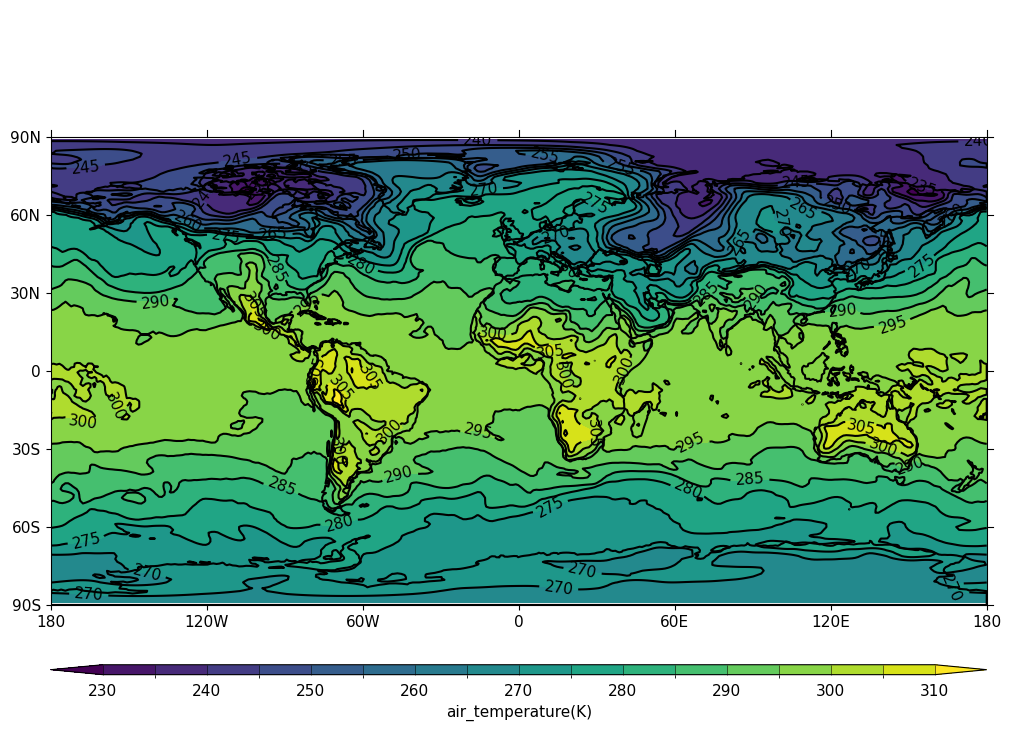

In [37]:
# These fields, from the latitude and longitude values, are defined over the globe
# We can see this, too, by plotting to see what the data is like - taking some representative subspaces to view snapshots in time

# 1. At 1000 mbar pressure, highest
cfp.con(f1.subspace(pressure=1000.0))

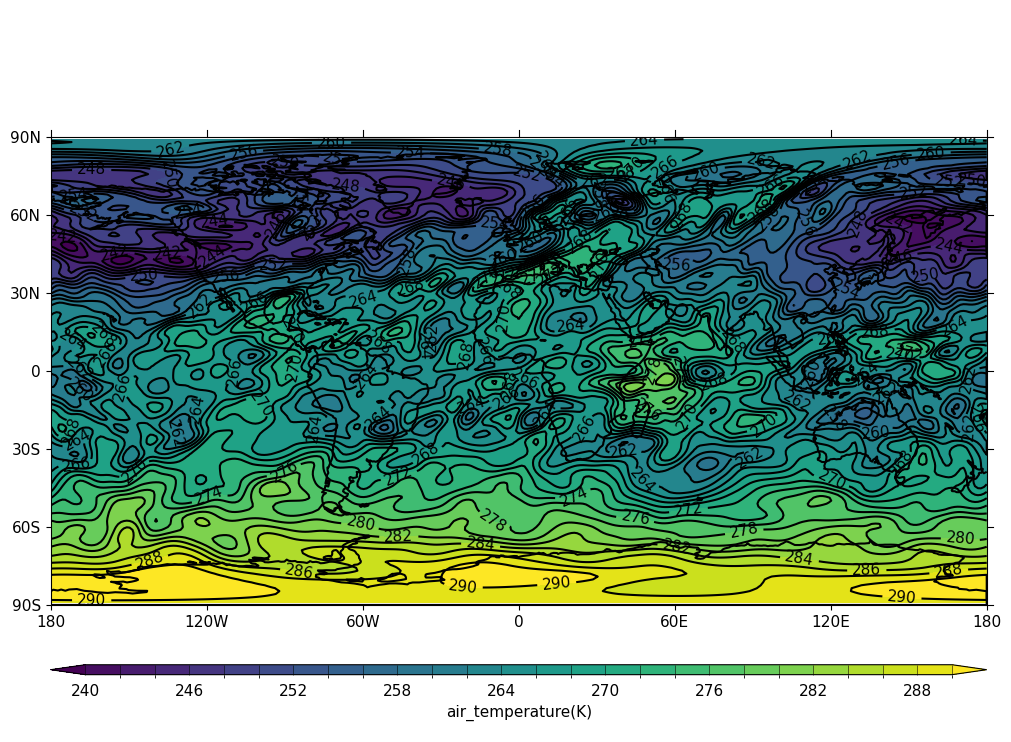

In [38]:
# 1. At 1 mbar pressure, lowest
cfp.con(f1.subspace(pressure=1.0))

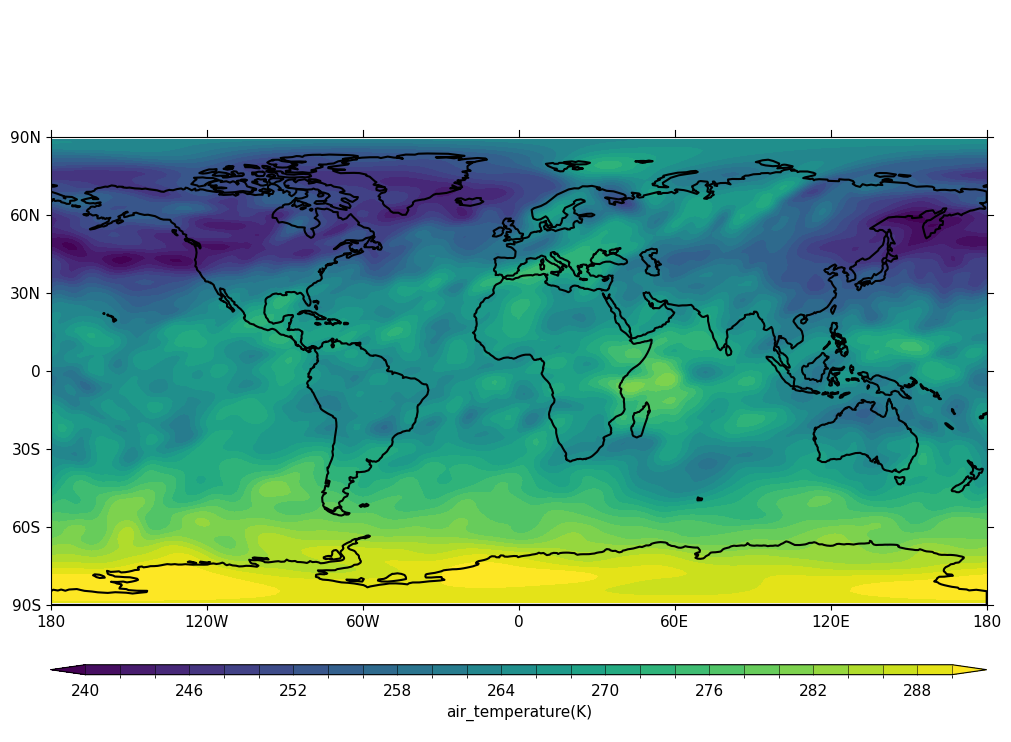

In [39]:
# cf-plot provides numerous ways to customise a specific plot such as these. We demonstrate just a small number here

# 1. The plot from the previous cell has contour lines which are so dense they obscure the world map and data pattern
# so let's hide those using 'lines=False'
cfp.con(f1.subspace(pressure=1.0), lines=False)

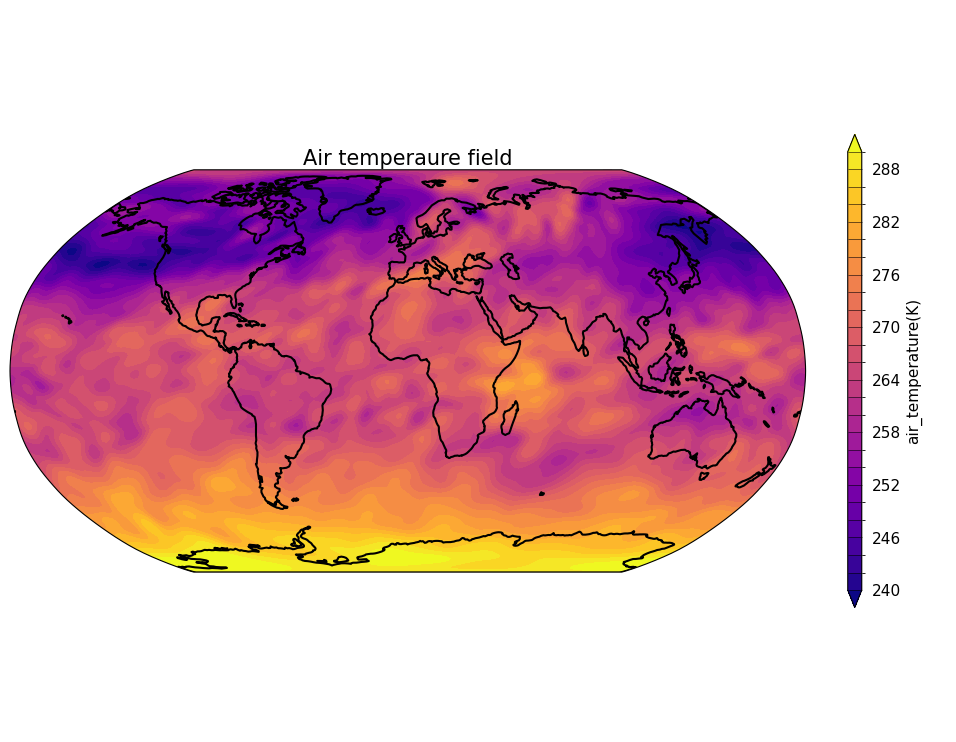

In [40]:
# 2. Let's view this data using another map projection and in a different colour scheme and move the colourbar to be
# vertical, plus add a title, to see some possibilities
cfp.mapset(proj="robin") # changes the projection
cfp.cscale("plasma")
cfp.con(f1.subspace(pressure=1.0), lines=False, colorbar_orientation="vertical", title="Air temperaure field")

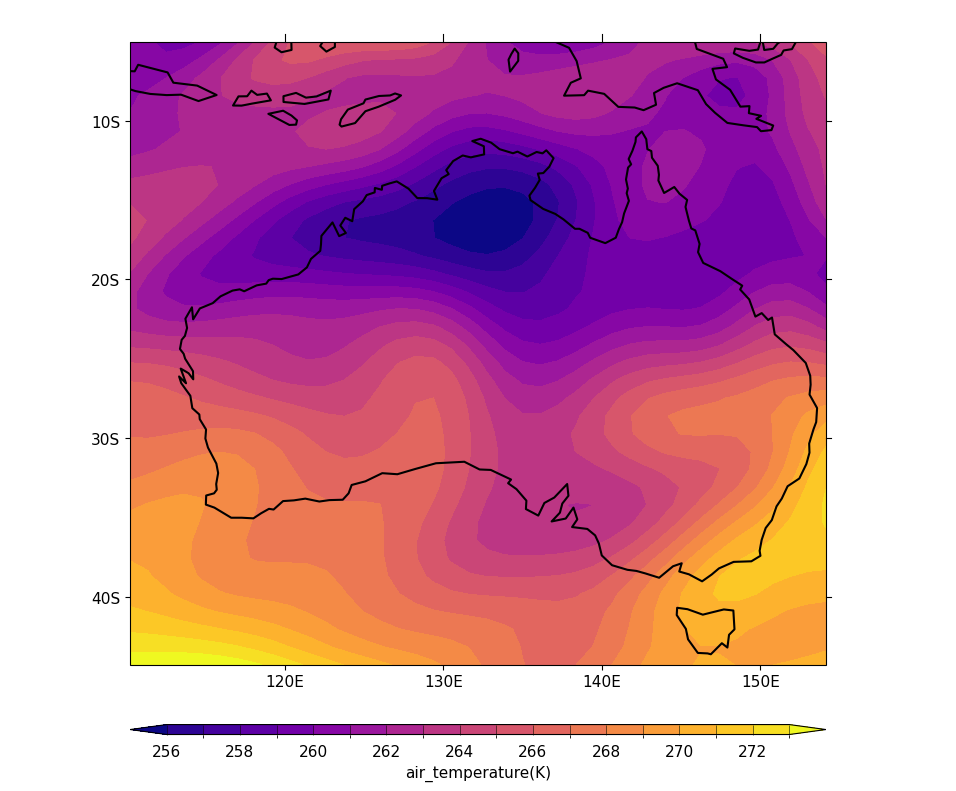

In [41]:
# 3. Maybe we want to view a smaller section of the data, say over . We can do this by reducing the data further
# (a) or by specifying to cf-plot to only show a smaller window on the data (b):
cfp.mapset(proj="cyl") # changes the projection

lonmin = 110
lonmax = 155
latmin = -45
latmax = -5

# a)
# Instead of a subspace on just pressure, we also suspace on X, Y i.e. lon and lat. We use 'cf.wi; whcih queries on a
# 'within' condition
f_subp = f1.subspace(pressure=1.0)
fsub_all = f_subp.subspace(longitude=cf.wi(lonmin, lonmax), latitude=cf.wi(latmin, latmax))
cfp.con(fsub_all.subspace(pressure=1.0), lines=False)

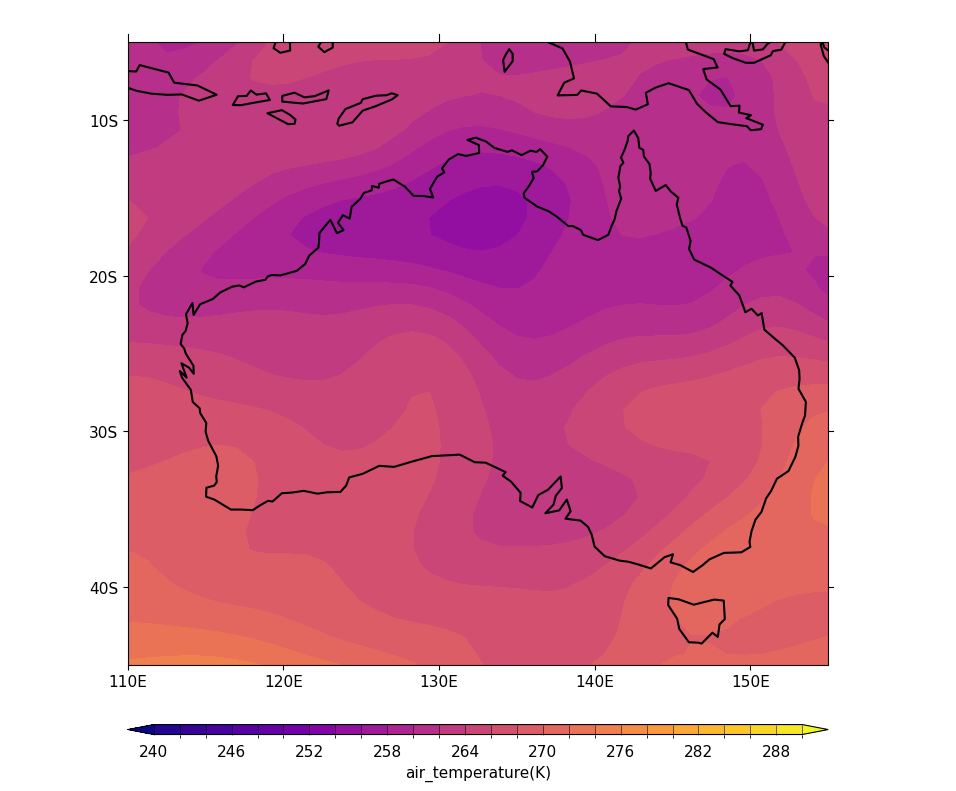

In [42]:
# b)
cfp.mapset(lonmin=lonmin, lonmax=lonmax, latmin=latmin, latmax=latmax) # also resets the projection to 'cyl'
cfp.con(f1.subspace(pressure=1.0), lines=False)
# Note in this case the colour scae is recalibrated/normalised to only account for the area shown 

In [43]:
# Finally let's make a vector plot
# Notice our final two fields from the read-in fieldlist are in eastward and northward components - therefore can be
# combined into vectors from these vector components!
print(f2)
print(f3)

Field: eastward_wind (ncvar%U)
------------------------------
Data            : eastward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(23) = [1000.0, ..., 1.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east
Field: northward_wind (ncvar%V)
-------------------------------
Data            : northward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(23) = [1000.0, ..., 1.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east


In [44]:
# Again we need to subspace in pressure so that we have a 3D not 4D space that can be visualised
u = f2.subspace(pressure=1.0)
v = f3.subspace(pressure=1.0)

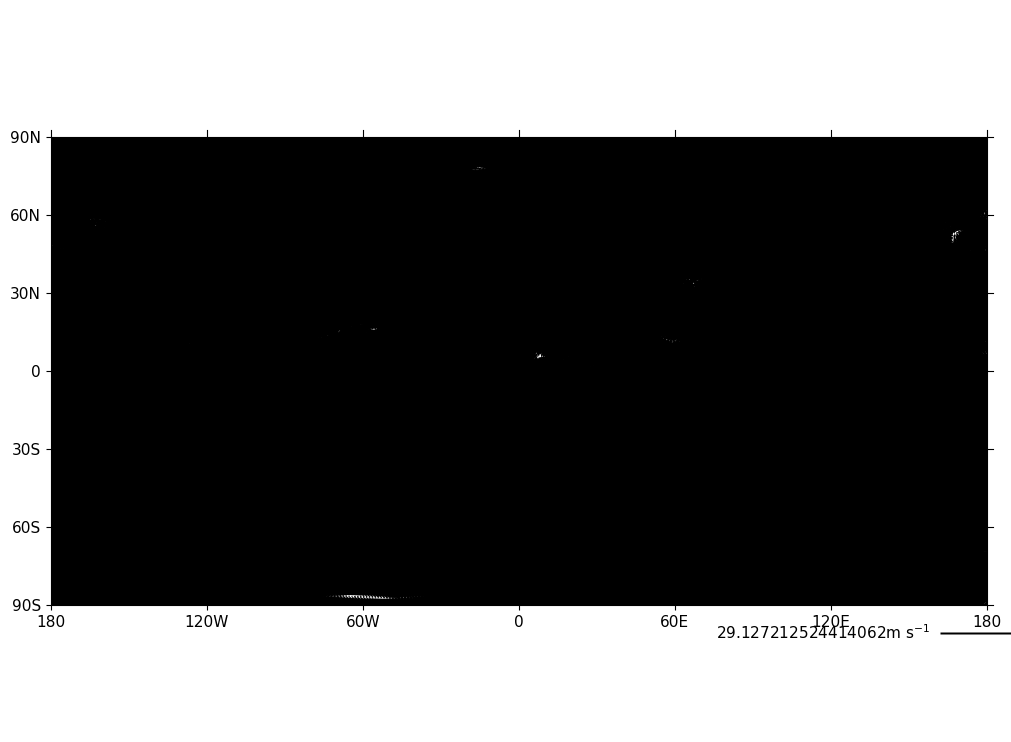

In [59]:
cfp.mapset()  # reset the mapping settings
cfp.vect(u=u, v=v) #, key_length=10, scale=100, stride=4)

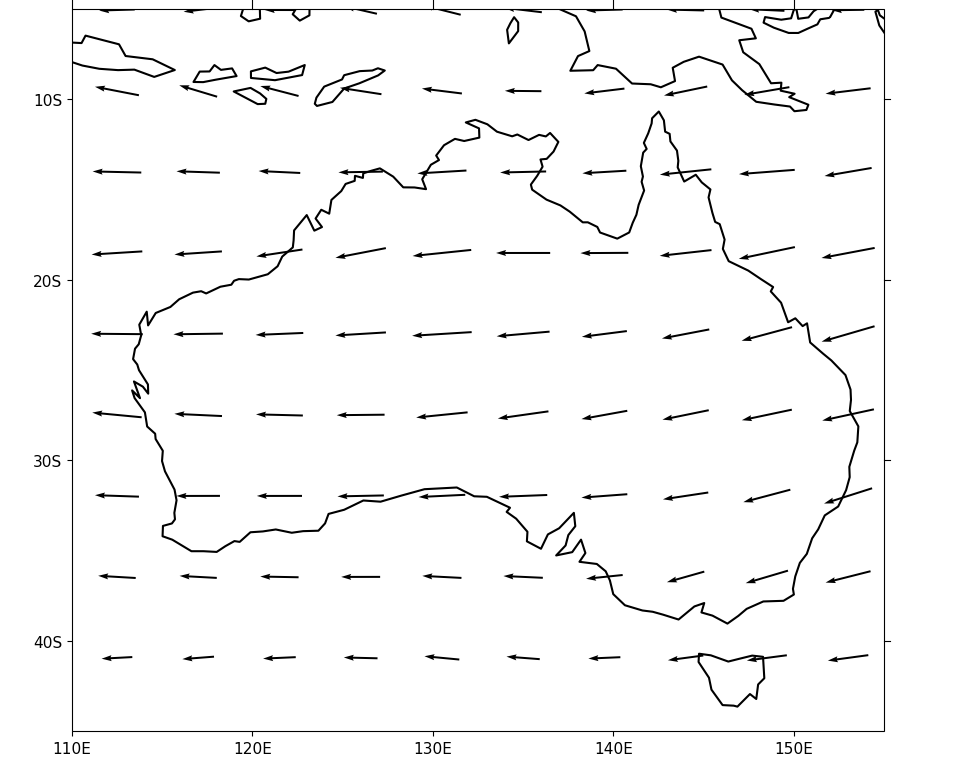

In [46]:
# Everything is black here - this is because we need to customise the vector spacing, there are clearly too many shown
cfp.vect(u=u, v=v, scale=100, stride=4)  # a bit better

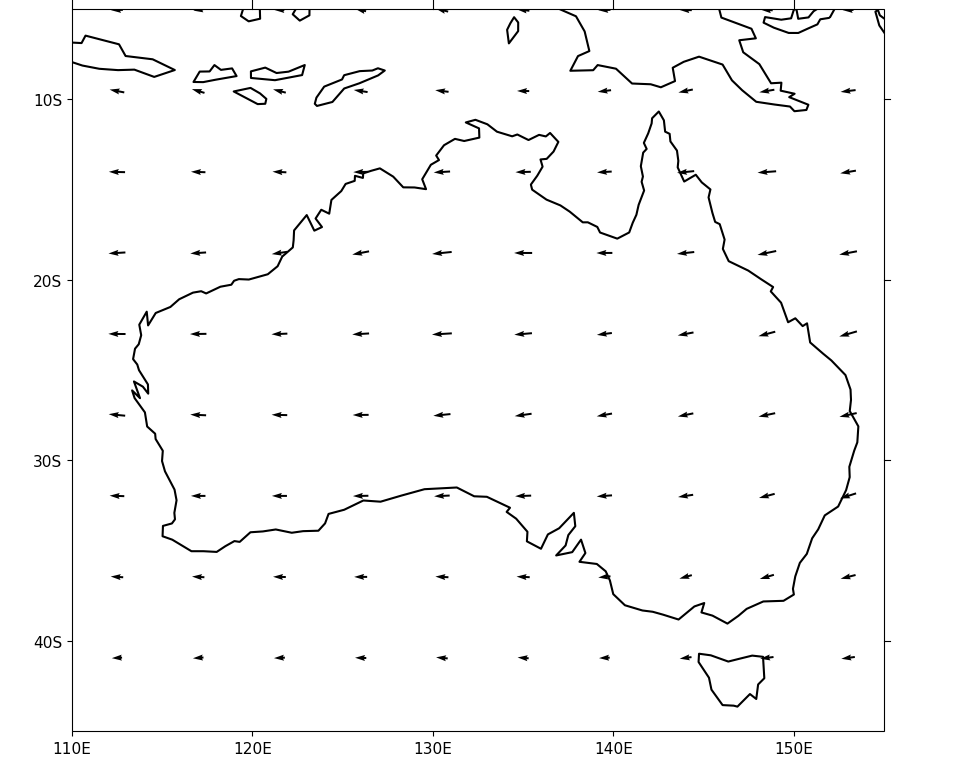

In [47]:
cfp.vect(u=u, v=v, scale=300, stride=4)  # a bit better

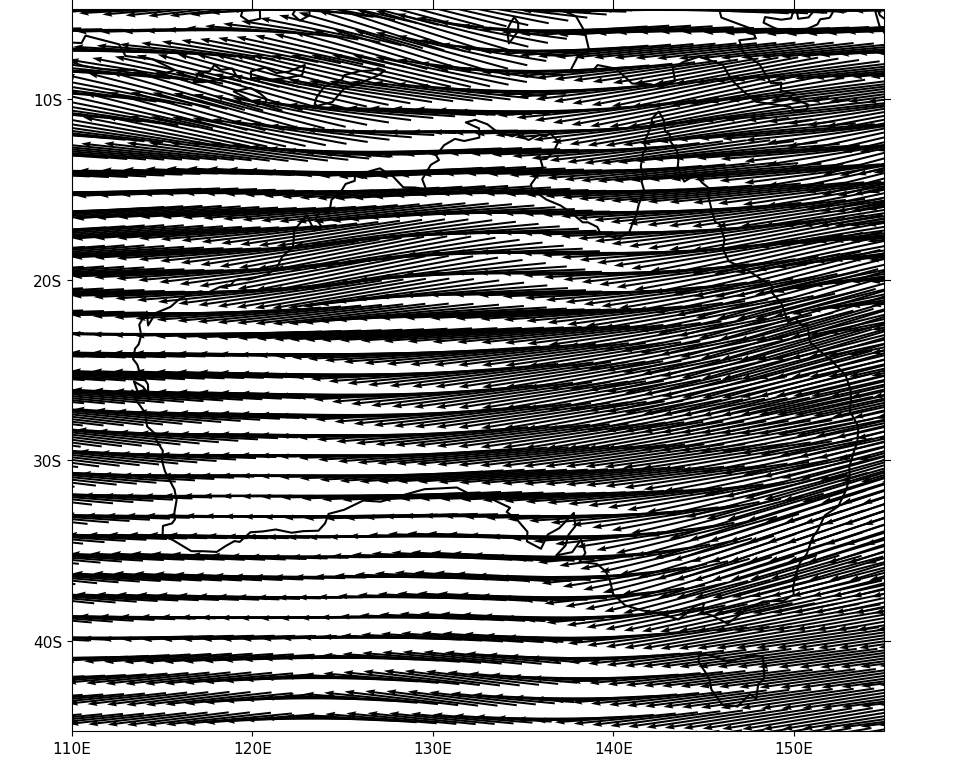

In [48]:
# (It looks like there is some interesting vector behaviour at the poles - you can explore this in the practical)
# Again we can focus in on specific areas - but we may need to adjust the vector spaing and size again for optimal viewing
cfp.mapset(lonmin=lonmin, lonmax=lonmax, latmin=latmin, latmax=latmax) # also resets the projection to 'cyl'
cfp.vect(u=u, v=v)

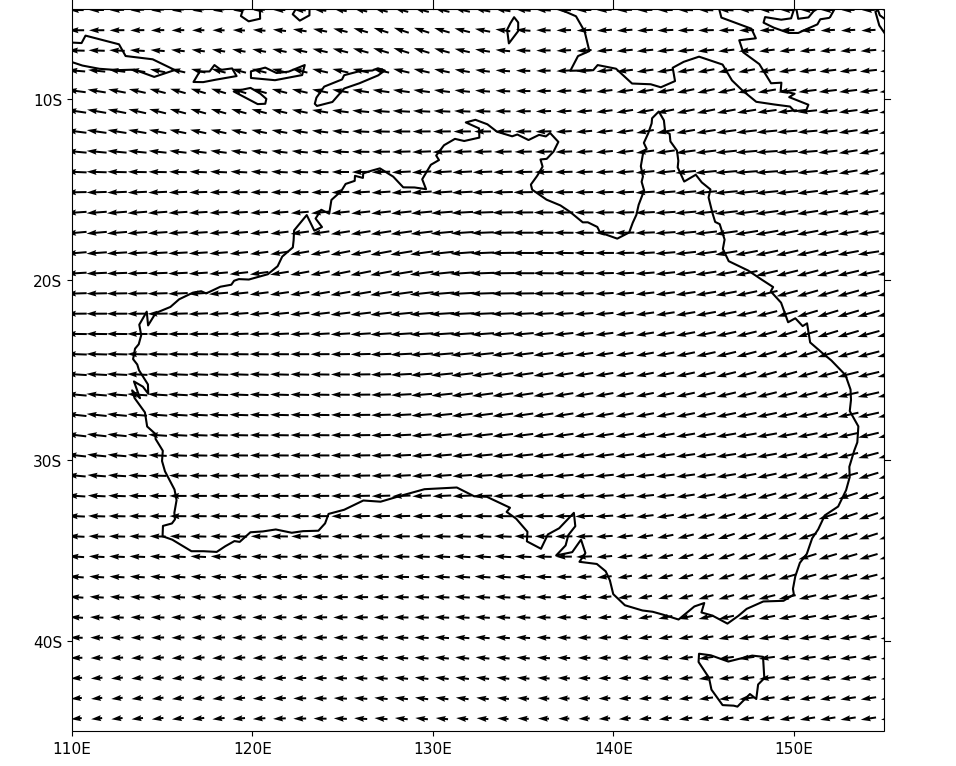

In [49]:
cfp.vect(u=u, v=v, scale=250, stride=1)  # a bit better

***

## 5. Data analysis using cf-python and cf-plot: arithmetic, statistics and plots of trends

**In this section we demonstrate how to do some data analysis including performing arithmetic and statistical calculations on the data, showing how cf-python's CF Conventions metadata awareness means that the metadata is automatically updated to account for the operations that are performed.**

***

## 6. Changing the underlying grid of data using cf-python: regridding

**In this section we demonstrate how to change the underlying grid of the data to another grid which could be a higher- or lower- resolution one, or a completely different grid, which is called regridding or interpolation, and indicate various options cf-python supports for doing this.**

In [50]:
# Read in a precipitation field and inspect it
f = cf.read("../ncas_data/precip_2010.nc")[0]
print(f)

Field: long_name=precipitation (ncvar%pre)
------------------------------------------
Data            : long_name=precipitation(long_name=time(12), latitude(145), longitude(53)) mm
Dimension coords: long_name=time(12) = [2010-01-16 00:00:00, ..., 2010-12-16 00:00:00] gregorian
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(53) = [-33.75, ..., 63.75] degrees_east


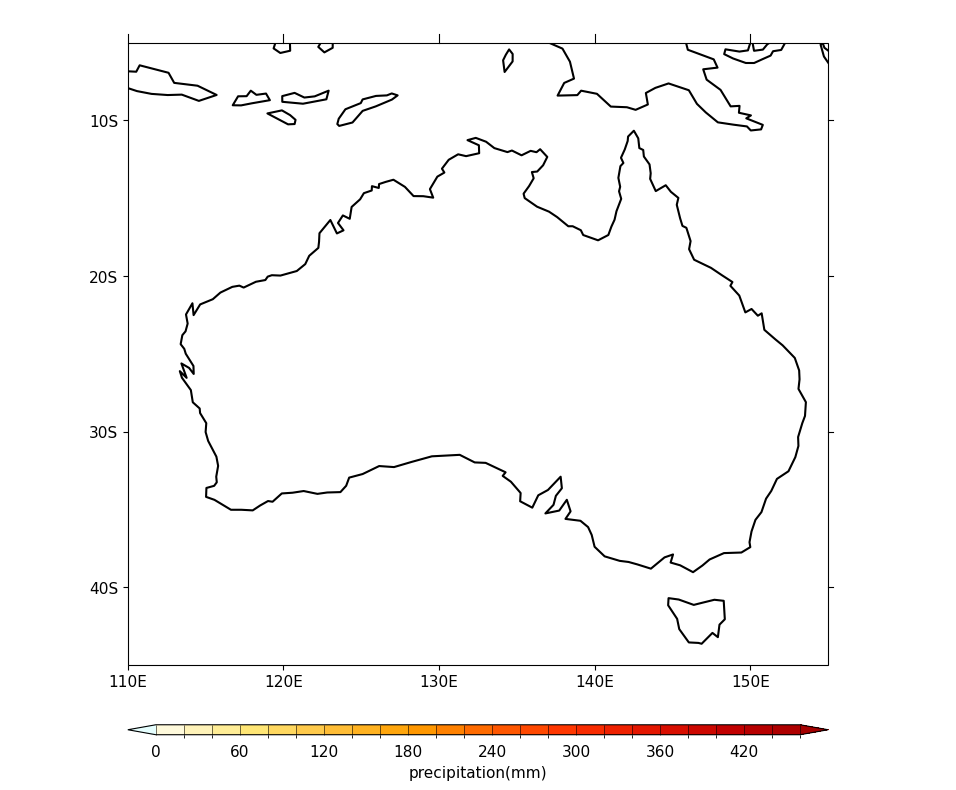

In [51]:
# Get a feel for the data we have from a view of a basic subspace
# Note we use the 'blockfill' argument which plots on a ceullar basis rather than filled as smoothed contours
cfp.con(f[0], blockfill=True, lines=False)

In [52]:
# Read in another, lower-resolution, precipitation field and inspect it
g = cf.read("../ncas_data/model_precip_DJF_means_low_res.nc")[0]
print(g)

Field: long_name=precipitation (ncvar%precip)
---------------------------------------------
Data            : long_name=precipitation(long_name=t(1), long_name=Surface(1), latitude(73), longitude(27)) mm/day
Cell methods    : long_name=t(1): mean
Dimension coords: long_name=t(1) = [1996-07-16 00:00:00] 360_day
                : long_name=Surface(1) = [0.0] level
                : latitude(73) = [-90.0, ..., 90.0] degrees_north
                : longitude(27) = [-33.75, ..., 63.75] degrees_east


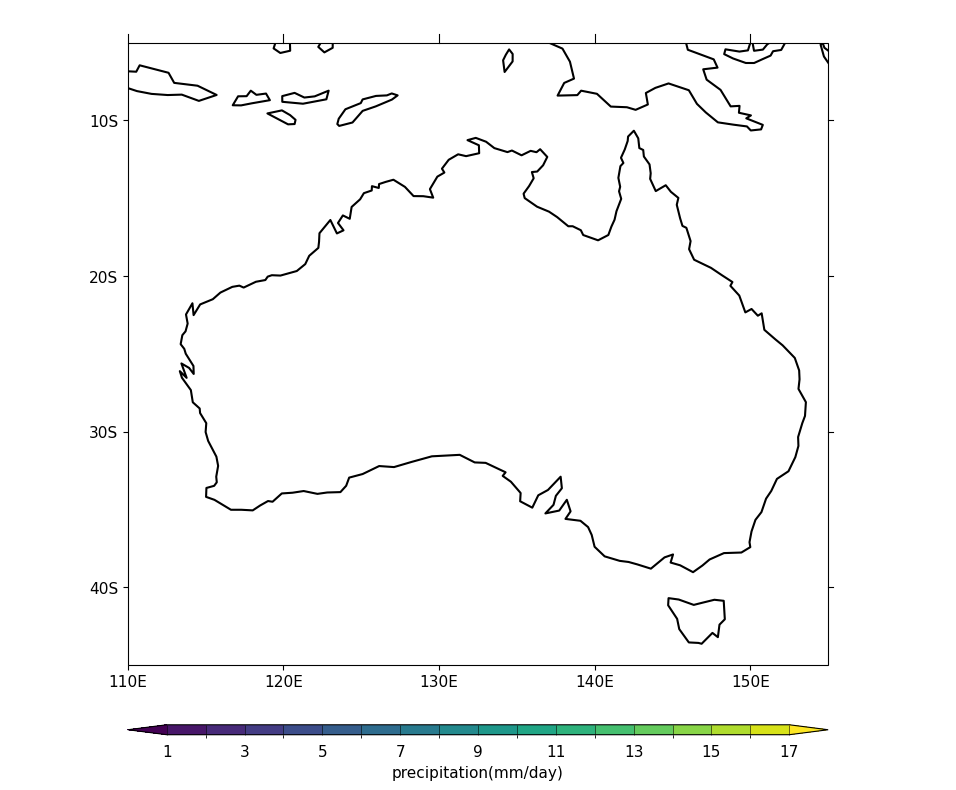

In [53]:
# Again, get a feel for the data we have from a view of a basic subspace
cfp.con(g[0], blockfill=True, lines=False)

In [54]:
# Regrid the first field to the grid of the second. We use the regrids method of cf-python.
# We are going to do two calls, demonstrating two different methods of interpolation, 'path' and 'conservative'
h_1 = f.regrids(g, method='patch')
h_2 = f.regrids(g, method='conservative')

In [55]:
# These two methods do not give the same results!
h_1.equals(h_2)

False

In [56]:
# Do some arithmetic on the fields to see the difference between the two regridded outcomes differing by interpolation method
difference_h1_h2 = h_1 - h_2

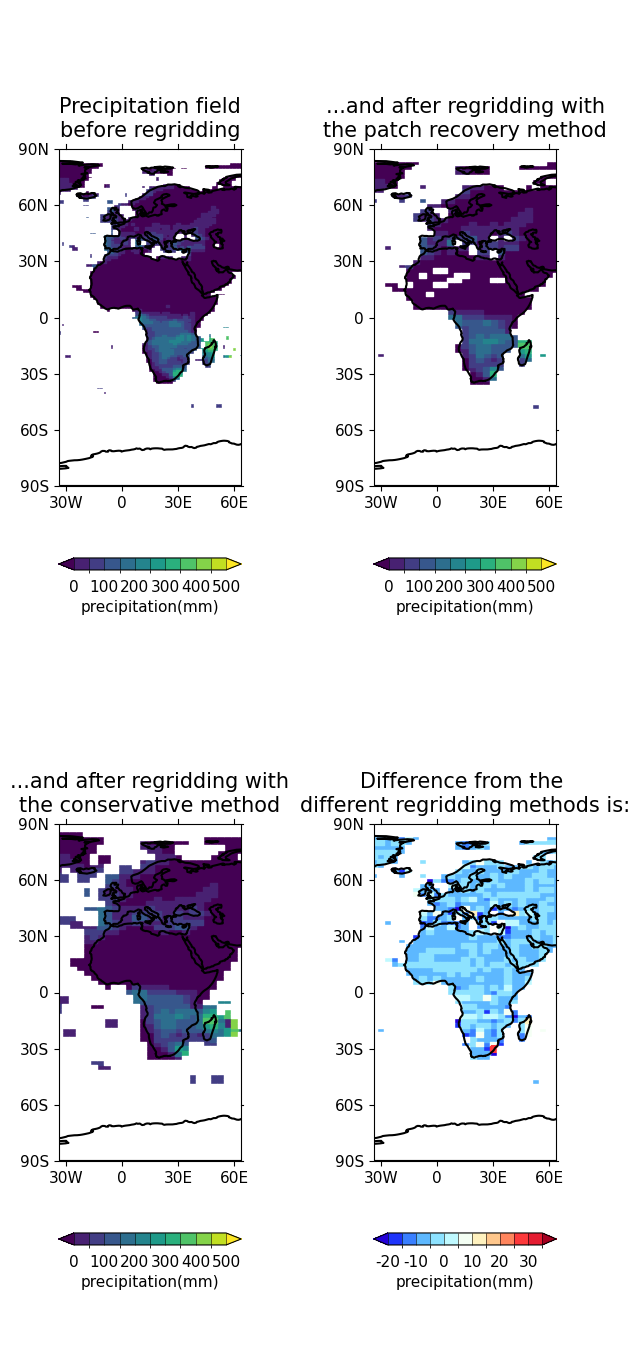

In [57]:
# Demonstration of more advanced cf-plot plotting to plot subplots and change colour scales etc.

# Note here we are taking the [0] index subspace but we can use any other subspace of the data to view
cfp.cscale("viridis")  # reset cmap to perceptually uniform scale
cfp.gopen(rows=2, columns=2, figsize=[7, 15])  #, bottom=0.1, top=0.85)

# Confiure first three plots
cfp.mapset()  # reset from previous plots in the notebook - standalone don't need this
cfp.levs(min=0, max=500, step=50)

# First three plots
cfp.gpos(xmin=0.1, xmax=0.5, ymin=0.55, ymax=1.0)
cfp.con(
    f[0], blockfill=True, lines=False,
    title='Precipitation field\nbefore regridding',
)
cfp.gpos(xmin=0.55, xmax=0.95, ymin=0.55, ymax=1.0)
cfp.con(
    h_1[0], blockfill=True, lines=False,
    title='...and after regridding with\nthe patch recovery method',
)
cfp.gpos(xmin=0.1, xmax=0.5, ymin=0.1, ymax=0.55)
cfp.con(
    h_2[0], blockfill=True, lines=False,
    title='...and after regridding with\nthe conservative method',
)
cfp.gpos(xmin=0.55, xmax=0.95, ymin=0.1, ymax=0.55)

# This final plot is showing the diff so is a bit different, apply some cf-plot plotting config.
cfp.levs()
cfp.cscale("BlueDarkRed18")  # is a diff so use a diverging colourmap
cfp.con(
    difference_h1_h2[0], blockfill=True, lines=False,
    title='Difference from the \ndifferent regridding methods is:',
)
cfp.gclose()

In [58]:
# More generally, you can convert from one grid to another very different grid, e.g. from a tripolar to a regular latitude-longitude grid of vice-versa, including to/from unstructured grids (UGRID grids).

***

## Conclusion and recap of learning objectives

The NCAS CF Data Tools are a suite of Python libraries which are designed to facilitate working with data for research in the earth sciences and aligned domains. We learnt today about the cf-python (https://ncas-cms.github.io/cf-python/) and cf-plot (https://ncas-cms.github.io/cf-plot/build/). The 'cf' in the names of the NCAS CF Data Tools corresponds to the CF Conventions, a metadata standard becoming the de-facto convention across geoscience to cover the description of data so that sharing and intercomparison is simpler.

Our learning aim was to be able to use the NCAS CF Data Tools Python libraries, namely cf-python and cf-plot to process, analyse and visualise netCDF and PP datasets, whilst appreciating the context and 'unique selling point' of the libraries as being built to use the CF Conventions, a metadata standard for earth science data, to make it simpler to do what you want to do with the datasets, by working on top of a Data Model for CF. We practiced:

* using cf-python to read dataset(s) and view the (meta)data at different detail levels;
* using cf-python to edit the data and write out the edited data to file;
* reducing datasets using cf-python: subspacing and collapsing;
* visualising datasets using cf-plot: contour and vector plots;
* data analysis using cf-python and cf-plot: arithmetic, statistics and plots of trends;
* changing the underlying grid of data using cf-python: regridding.

***

## Where to find more information and resources on the NCAS CF Data Tools

Useful links relating to this training:

* cf-python code home (GitHub), including Issue Tracker to report queries or questions: https://github.com/NCAS-CMS/cf-python
* cf-python documentation: https://ncas-cms.github.io/cf-python/
* cf-plot code home (GitHub), including Issue Tracker to report queries or questions: https://github.com/NCAS-CMS/cf-plot
* cf-plot documentation: https://ncas-cms.github.io/cf-plot/build/
* Technical presentation about the NCAS CF Data Tools: https://hps.vi4io.org/_media/events/2020/summer-school-cfnetcdf.pdf
* CF Conventions homepage: https://cfconventions.org/
* CF Conventions training homepage: https://cfconventions.org/Training/
* This training is hosted at: https://github.com/NCAS-CMS/cf-tools-training
* [ TODO add link to ISC course page ]

If you have any questions later, either use the Issue Trackers above or you can email me at: sadie.bartholomew@ncas.ac.uk.

***